In [790]:
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss,confusion_matrix
import plotly.express as px  
import sklearn
import math
import copy
import torch.optim as optim

In [791]:
results = pd.read_csv('resultshuffled.csv')   
#pobranie z pliku danych po shuffle

In [792]:
results = results.drop(['Unnamed: 0'], axis = 1)
results

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
0,14625282,11.02,1463,0.488281,203,203,1,NaN,11.01,4,2017,3,11.01,NaN,NaN,NaN,NaN,NaN
1,14176817,11.14,1242,0.324219,26,26,1,26.32,10.66,25,2011,5,10.99,0.676667,0.61,0.955282,3.0,0.0
2,14810104,10.99,360,0.218750,145,145,1,19.11,10.78,30,2020,8,10.87,0.481667,0.82,0.961808,2.0,1.0
3,14513494,10.84,1609,0.476562,203,203,1,20.17,10.70,6,2013,4,10.70,NaN,NaN,NaN,NaN,NaN
4,14471093,10.63,319,0.503906,29,29,1,23.52,10.54,38,2014,4,10.64,0.703333,0.65,0.911363,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581272,14591375,11.12,2409,NaN,203,203,1,NaN,10.76,18,2021,1,NaN,NaN,NaN,NaN,NaN,NaN
581273,14743422,10.75,2577,0.410156,203,203,1,NaN,10.49,7,2021,1,NaN,NaN,NaN,NaN,NaN,NaN
581274,14238079,10.39,4,0.410156,203,203,1,21.07,10.35,21,2004,6,10.35,NaN,NaN,NaN,NaN,NaN
581275,14191607,10.46,1197,0.273438,75,75,1,33.53,10.12,242,2007,12,10.48,NaN,NaN,NaN,NaN,NaN


ucinamy wartości odstające

In [793]:
results = results[results.wynik < 12]   #usuniecie wartosci odstajacych
results

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
0,14625282,11.02,1463,0.488281,203,203,1,NaN,11.01,4,2017,3,11.01,NaN,NaN,NaN,NaN,NaN
1,14176817,11.14,1242,0.324219,26,26,1,26.32,10.66,25,2011,5,10.99,0.676667,0.61,0.955282,3.0,0.0
2,14810104,10.99,360,0.218750,145,145,1,19.11,10.78,30,2020,8,10.87,0.481667,0.82,0.961808,2.0,1.0
3,14513494,10.84,1609,0.476562,203,203,1,20.17,10.70,6,2013,4,10.70,NaN,NaN,NaN,NaN,NaN
4,14471093,10.63,319,0.503906,29,29,1,23.52,10.54,38,2014,4,10.64,0.703333,0.65,0.911363,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581272,14591375,11.12,2409,NaN,203,203,1,NaN,10.76,18,2021,1,NaN,NaN,NaN,NaN,NaN,NaN
581273,14743422,10.75,2577,0.410156,203,203,1,NaN,10.49,7,2021,1,NaN,NaN,NaN,NaN,NaN,NaN
581274,14238079,10.39,4,0.410156,203,203,1,21.07,10.35,21,2004,6,10.35,NaN,NaN,NaN,NaN,NaN
581275,14191607,10.46,1197,0.273438,75,75,1,33.53,10.12,242,2007,12,10.48,NaN,NaN,NaN,NaN,NaN


# 1. Ucinamy NaN

In [794]:
kol_nan = []
for k in results.columns:
    if results.describe()[k]['count'] < len(results):
        print(k, results.describe()[k]['count'])
        kol_nan.append(k)

wiatr 545534.0
wiek 494971.0
pb_aktualne 546725.0
sb_aktualne 455012.0
Temperature 244500.0
Humidity 244500.0
Pressure 244500.0
Condition 240634.0
Rain 240634.0


In [795]:
results1 = copy.deepcopy(results)
for k in kol_nan:
    results1 = results1[results1[k].isna()==False]
results1

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
1,14176817,11.14,1242,0.324219,26,26,1,26.32,10.66,25,2011,5,10.99,0.676667,0.610,0.955282,3.0,0.0
2,14810104,10.99,360,0.218750,145,145,1,19.11,10.78,30,2020,8,10.87,0.481667,0.820,0.961808,2.0,1.0
4,14471093,10.63,319,0.503906,29,29,1,23.52,10.54,38,2014,4,10.64,0.703333,0.650,0.911363,5.0,0.0
5,14213001,11.11,2337,0.343750,125,125,1,25.78,10.62,42,2013,2,11.11,0.713333,0.270,0.935354,3.0,0.0
11,14168632,10.96,2862,0.328125,53,53,1,25.18,10.59,28,2007,4,10.85,0.666667,0.570,0.938962,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581264,14176109,10.75,3542,0.304688,29,29,1,27.42,10.40,18,2010,13,10.70,0.463333,0.820,0.897839,2.0,0.0
581265,14573657,10.77,2171,0.390625,71,71,1,20.72,10.68,22,2017,5,10.69,0.556667,0.795,0.975361,5.0,0.0
581266,14329261,10.63,328,0.351562,71,71,1,18.58,10.60,8,2008,8,10.60,0.583333,0.880,0.975197,3.0,0.0
581268,14812670,11.32,3529,0.269531,15,15,1,16.86,11.31,12,2020,2,11.42,0.583333,0.680,0.985637,3.0,0.0


In [796]:
#podział na 30% danych
d3 = int(len(results1) * 0.3)
d3

56923

In [797]:
results_train1 = results1[:d3]
results_train1

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
1,14176817,11.14,1242,0.324219,26,26,1,26.32,10.66,25,2011,5,10.99,0.676667,0.610,0.955282,3.0,0.0
2,14810104,10.99,360,0.218750,145,145,1,19.11,10.78,30,2020,8,10.87,0.481667,0.820,0.961808,2.0,1.0
4,14471093,10.63,319,0.503906,29,29,1,23.52,10.54,38,2014,4,10.64,0.703333,0.650,0.911363,5.0,0.0
5,14213001,11.11,2337,0.343750,125,125,1,25.78,10.62,42,2013,2,11.11,0.713333,0.270,0.935354,3.0,0.0
11,14168632,10.96,2862,0.328125,53,53,1,25.18,10.59,28,2007,4,10.85,0.666667,0.570,0.938962,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173994,14642903,10.42,2056,0.355469,71,71,1,27.17,10.25,31,2022,12,10.25,0.760000,0.300,0.985309,5.0,0.0
173997,14933877,10.93,1976,0.402344,65,65,1,19.33,10.65,8,2022,8,10.65,0.565000,0.770,0.970300,2.0,0.0
174001,14174878,10.70,2546,0.343750,176,32,0,20.17,10.37,16,2006,6,10.37,0.778333,0.425,0.968661,5.0,0.0
174009,14702080,10.73,910,0.429688,96,96,1,24.10,10.76,43,2022,3,10.76,0.810176,0.380,0.918219,5.0,0.0


In [798]:
results_test1 = results1[d3:]
results_test1

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
174012,14518696,10.43,1098,0.410156,60,51,0,25.99,10.00,98,2021,7,10.44,0.593333,0.680,0.968343,5.0,0.0
174013,14200593,10.61,2996,0.296875,96,96,1,22.56,10.47,22,2006,11,10.47,0.843333,0.380,0.965075,5.0,0.0
174019,14688760,10.80,632,0.382812,60,139,0,20.38,10.53,25,2019,2,10.97,0.658333,0.515,0.972913,5.0,0.0
174020,14380930,10.89,3775,0.437500,53,53,1,17.91,10.84,13,2010,2,10.84,0.676667,0.515,0.937988,5.0,0.0
174021,14174301,10.31,569,0.359375,36,36,1,26.97,10.08,35,1999,4,10.46,0.575000,0.550,0.855531,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581264,14176109,10.75,3542,0.304688,29,29,1,27.42,10.40,18,2010,13,10.70,0.463333,0.820,0.897839,2.0,0.0
581265,14573657,10.77,2171,0.390625,71,71,1,20.72,10.68,22,2017,5,10.69,0.556667,0.795,0.975361,5.0,0.0
581266,14329261,10.63,328,0.351562,71,71,1,18.58,10.60,8,2008,8,10.60,0.583333,0.880,0.975197,3.0,0.0
581268,14812670,11.32,3529,0.269531,15,15,1,16.86,11.31,12,2020,2,11.42,0.583333,0.680,0.985637,3.0,0.0


In [799]:
wynik_train1 = results_train1['wynik']
wynik_train1

1         11.14
2         10.99
4         10.63
5         11.11
11        10.96
          ...  
173994    10.42
173997    10.93
174001    10.70
174009    10.73
174010    10.92
Name: wynik, Length: 56923, dtype: float64

In [800]:
wynik_test1 = results_test1['wynik']
wynik_test1

174012    10.43
174013    10.61
174019    10.80
174020    10.89
174021    10.31
          ...  
581264    10.75
581265    10.77
581266    10.63
581268    11.32
581271    10.79
Name: wynik, Length: 132821, dtype: float64

In [801]:
results_train1 = results_train1.drop(['wynik'], axis = 1)
results_test1 = results_test1.drop(['wynik'], axis = 1)

# 2. NaN na średnie

In [802]:
results2 = copy.deepcopy(results)

In [803]:
for i, k in enumerate(kol_nan):
    if i < len(kol_nan)-2:    #srednia wartosc
        m = results2[k].mean()
    else:                   #najczestsza wartosc
        m= float(results2[k].mode())
    results2[k].fillna(value=m, inplace=True)
results2

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
0,14625282,11.02,1463,0.488281,203,203,1,22.3273,11.010000,4,2017,3,11.010000,0.666342,0.619175,0.951745,5.0,0.0
1,14176817,11.14,1242,0.324219,26,26,1,26.3200,10.660000,25,2011,5,10.990000,0.676667,0.610000,0.955282,3.0,0.0
2,14810104,10.99,360,0.218750,145,145,1,19.1100,10.780000,30,2020,8,10.870000,0.481667,0.820000,0.961808,2.0,1.0
3,14513494,10.84,1609,0.476562,203,203,1,20.1700,10.700000,6,2013,4,10.700000,0.666342,0.619175,0.951745,5.0,0.0
4,14471093,10.63,319,0.503906,29,29,1,23.5200,10.540000,38,2014,4,10.640000,0.703333,0.650000,0.911363,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581272,14591375,11.12,2409,0.375250,203,203,1,22.3273,10.760000,18,2021,1,10.698375,0.666342,0.619175,0.951745,5.0,0.0
581273,14743422,10.75,2577,0.410156,203,203,1,22.3273,10.490000,7,2021,1,10.698375,0.666342,0.619175,0.951745,5.0,0.0
581274,14238079,10.39,4,0.410156,203,203,1,21.0700,10.350000,21,2004,6,10.350000,0.666342,0.619175,0.951745,5.0,0.0
581275,14191607,10.46,1197,0.273438,75,75,1,33.5300,10.120000,242,2007,12,10.480000,0.666342,0.619175,0.951745,5.0,0.0


In [804]:
#podział na 30% danych
d32 = int(len(results2) * 0.3)
d32

174115

In [805]:
results_train2 = results2[:d32]
results_train2

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
0,14625282,11.02,1463,0.488281,203,203,1,22.3273,11.01,4,2017,3,11.01,0.666342,0.619175,0.951745,5.0,0.0
1,14176817,11.14,1242,0.324219,26,26,1,26.3200,10.66,25,2011,5,10.99,0.676667,0.610000,0.955282,3.0,0.0
2,14810104,10.99,360,0.218750,145,145,1,19.1100,10.78,30,2020,8,10.87,0.481667,0.820000,0.961808,2.0,1.0
3,14513494,10.84,1609,0.476562,203,203,1,20.1700,10.70,6,2013,4,10.70,0.666342,0.619175,0.951745,5.0,0.0
4,14471093,10.63,319,0.503906,29,29,1,23.5200,10.54,38,2014,4,10.64,0.703333,0.650000,0.911363,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174354,14507664,10.97,1956,0.332031,71,71,1,18.1500,10.60,26,2014,14,10.60,0.588333,0.730000,0.971438,2.0,1.0
174355,14255105,10.26,2577,0.425781,203,203,1,24.9900,9.96,61,2008,11,9.96,0.666342,0.619175,0.951745,5.0,0.0
174356,14510662,10.54,1464,0.359375,203,203,1,21.0100,10.31,9,2012,9,10.31,0.666342,0.619175,0.951745,5.0,0.0
174357,14751798,11.15,2955,0.281250,75,75,1,20.5600,10.80,30,2019,12,10.80,0.666342,0.619175,0.951745,5.0,0.0


In [806]:
results_test2 = results2[d32:]
results_test2

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
174359,14217436,10.73,2862,0.386719,53,157,0,21.3700,10.580000,16,2004,3,10.780000,0.528333,0.880000,0.934699,3.0,0.0
174360,14429816,11.02,3999,0.402344,75,75,1,17.4100,10.605709,1,2011,1,10.698375,0.666342,0.619175,0.951745,5.0,0.0
174361,14377670,10.70,1044,0.507812,203,36,0,21.3700,10.660000,15,2014,4,10.770000,0.666342,0.619175,0.951745,5.0,0.0
174362,14379918,11.29,3534,0.277344,87,87,1,20.9600,10.700000,28,2012,8,10.700000,0.750000,0.470000,0.960834,5.0,0.0
174363,14170108,10.58,522,0.343750,10,46,0,21.6400,10.180000,32,2006,15,10.180000,0.583333,0.730000,0.982691,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581272,14591375,11.12,2409,0.375250,203,203,1,22.3273,10.760000,18,2021,1,10.698375,0.666342,0.619175,0.951745,5.0,0.0
581273,14743422,10.75,2577,0.410156,203,203,1,22.3273,10.490000,7,2021,1,10.698375,0.666342,0.619175,0.951745,5.0,0.0
581274,14238079,10.39,4,0.410156,203,203,1,21.0700,10.350000,21,2004,6,10.350000,0.666342,0.619175,0.951745,5.0,0.0
581275,14191607,10.46,1197,0.273438,75,75,1,33.5300,10.120000,242,2007,12,10.480000,0.666342,0.619175,0.951745,5.0,0.0


In [807]:
wynik_train2 = results_train2['wynik']
wynik_train2

0         11.02
1         11.14
2         10.99
3         10.84
4         10.63
          ...  
174354    10.97
174355    10.26
174356    10.54
174357    11.15
174358    10.88
Name: wynik, Length: 174115, dtype: float64

In [808]:
wynik_test2 = results_test2['wynik']

In [809]:
results_train2 = results_train2.drop(['wynik'], axis = 1)
results_test2 = results_test2.drop(['wynik'], axis = 1)

# Wybieranie najwazniejszych cech

In [810]:
#metoda lasso
def soft_threshold(r, rho, lamda):
    if rho < - lamda:   #porownanie wspolczynnika rho z parametrem lamda
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0

def coordinate_descent_lasso(X, Y, num_iters, lamda):
    m, n = X.shape   #ksztalt X
    for i in range(num_iters):
        lista = []
        for j in range(n):
            blad = Y - np.dot(X, np.ones(n))  #wielkosc bledu
            r = np.sum(np.power(X[X.columns[j]], 2))            
            rho = np.sum(np.dot((blad + np.array(X[X.columns[j]])), X[X.columns[j]]))
            lista.append(soft_threshold(r, rho, lamda))
        
    dobre_cechy = []
    for s, k in enumerate(lista):
        if k != 0:   #do dobrych cech wybierane sa tylko te cechy, ktorych wartosc jest > 0, 
                       #czyli spelnily warunek rho >  lamda lub rho < - lamda
            dobre_cechy.append(X.columns[s])
    return dobre_cechy

In [811]:
cechy_lasso = coordinate_descent_lasso(results_train2, wynik_train2, 20, 8e13)
#cechy_lasso = coordinate_descent_lasso(results_train2, wynik_train2, 20, 1e12)   #piec najbardziej, wszystkie NaN = srednia
print('cechy lasso:', cechy_lasso)

cechy lasso: ['numer', 'City', 'kraj_zawodow', 'kraj_urodz', 'czy_kraj', 'wiek', 'pb_aktualne', 'nr_start_kariera', 'rok', 'nr_start_sezon', 'sb_aktualne', 'Temperature', 'Humidity', 'Pressure', 'Condition']


In [812]:
set(list(results_train1.columns)) - set(cechy_lasso)   #dwie najmniej istotne cechy - usuniecie NaN

{'Rain', 'wiatr'}

In [813]:
cechy_lasso   #piec najbardziej istotnych cech - usuniecie NaN

['numer',
 'City',
 'kraj_zawodow',
 'kraj_urodz',
 'czy_kraj',
 'wiek',
 'pb_aktualne',
 'nr_start_kariera',
 'rok',
 'nr_start_sezon',
 'sb_aktualne',
 'Temperature',
 'Humidity',
 'Pressure',
 'Condition']

In [814]:
set(list(results_train1.columns)) - set(cechy_lasso)   #dwie najmniej istotne cechy, wszystkie, NaN = srednia

{'Rain', 'wiatr'}

In [815]:
cechy_lasso   #piec najbardziej istotnych cech wszystkie, NaN = srednia

['numer',
 'City',
 'kraj_zawodow',
 'kraj_urodz',
 'czy_kraj',
 'wiek',
 'pb_aktualne',
 'nr_start_kariera',
 'rok',
 'nr_start_sezon',
 'sb_aktualne',
 'Temperature',
 'Humidity',
 'Pressure',
 'Condition']

# Uczenie

In [868]:
x = torch.tensor(results_train1.values, dtype=torch.float)
x_test=torch.tensor(results_test1.values, dtype=torch.float)
y = torch.tensor(wynik_train1.values, dtype=torch.float)
y_test=torch.tensor(wynik_test1.values, dtype=torch.float)

In [869]:
model = nn.Sequential(
        nn.Linear(17, 20),
        nn.ReLU(),
        nn.Linear(20,100),
        nn.Sigmoid(),
        nn.Linear(100,1)
    )
model.to()

Sequential(
  (0): Linear(in_features=17, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=100, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=100, out_features=1, bias=True)
)

In [880]:
criterion = torch.nn.MSELoss()  #zmienic kryterium
optimizer = optim.SGD(model.parameters(), lr = 0.005)#, momentum = 0.9)   #lr - learning rate

#lr - zacznie mniejszy np. 10^-3
#0.0095 ->78%

Total training loss:  5374.406930057446
Loss test: 0.08361007
Total training loss:  5374.318611796365
Loss test: 0.08361062
Total training loss:  5374.318658760766
Loss test: 0.08361117


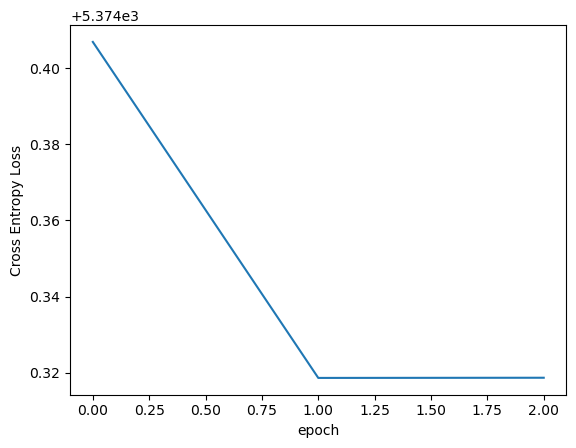

In [881]:
epochs=3
losses=[]
for epoch in range(epochs):
    totalLoss = 0
    pred_wart = []
    for i in range(len(x)):
        ypred = model(x[i])
        y_pred_test=model(x_test[i])
        pred_wart.append(y_pred_test)
        loss = criterion(ypred, y[i])
        totalLoss+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(totalLoss)
    print('Total training loss: ', totalLoss)
    with torch.no_grad():
        loss2 = criterion(y_pred_test, y_test[len(x)])
        print(f'Loss test: {loss2:.8f}')
    ##if epoch%50==0 or epoch==0:
        ##print('Total loss: ', totalLoss)

plt.plot(range(epochs), losses)#shows plot of the presented system
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')
plt.show()

Średnia, Min, Max, SSE, MSE, RMSE i R SQUARED

In [882]:
#sprawdzenie ile predykcji jest mniejszych od danego bledu
good = 0
wart = []
predyk = []
suma = 0
for i in range(len(y)):
    wart.append(y_test[i].item())
    predyk.append(pred_wart[i].item())
    suma += abs(y[i].item() - pred_wart[i].item())
    if abs(y[i].item() - pred_wart[i].item()) < 0.2:
        good += 1
print(good/len(y))

print('sredni blad:', suma/len(y)) #Mean Absolute Error
#<0.15 = 0.54 (z wartosciami odstajacymi) 0.48623579221053004, 0.48876552535881806
#obliczanie błędu SSE - suma kwadratów błędu estymacji, błąd średniokwadratowy i RMSE
e = np.array(wart) - np.array(predyk)
sse = np.sum(np.power(e, 2))
print('SSE:', sse)
mse = np.mean(np.power(e, 2))
print('MSE:', mse)
rmse = np.sqrt(np.mean(np.power(e, 2)))
print('RMSE:', rmse)

print('Max wart. testowa: ',max(wart))
print('Min wart. testowa: ',min(wart))
print('Max wart. przewidziana: ',max(predyk))
print('Min wart. przewidziana: ',min(predyk))

model=LinearRegression()
model.fit(x,y)
r_sq=model.score(x,y)
print(r_sq)
pd.qcut(predyk,q=17,precision=0)

0.4762222651652232
sredni blad: 0.24644876522020448
SSE: 5384.863988800373
MSE: 0.0945990898020198
RMSE: 0.3075696503265883
Max wart. testowa:  11.989999771118164
Min wart. testowa:  9.630000114440918
Max wart. przewidziana:  11.112103462219238
Min wart. przewidziana:  10.466387748718262
0.6938631882179684


[(10.74, 10.75], (10.78, 10.8], (10.81, 10.82], (10.78, 10.8], (10.82, 10.83], ..., (10.73, 10.74], (10.69, 10.71], (10.71, 10.73], (10.71, 10.73], (10.71, 10.73]]
Length: 56923
Categories (17, interval[float64, right]): [(10.46, 10.66] < (10.66, 10.69] < (10.69, 10.71] < (10.71, 10.73] ... (10.83, 10.85] < (10.85, 10.87] < (10.87, 10.9] < (10.9, 11.11]]

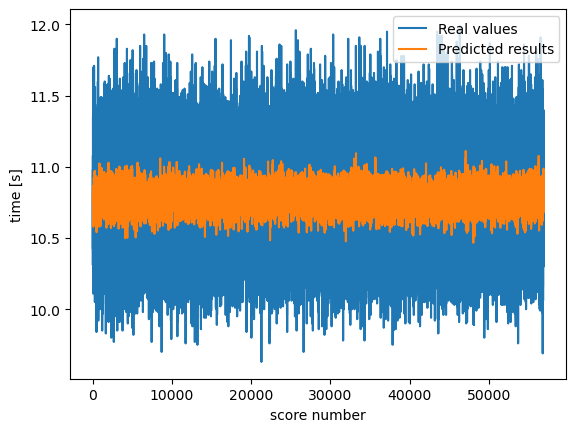

In [883]:
plt.plot(wart, label='Real values')
plt.plot(predyk, label = 'Predicted results')
plt.xlabel('score number')
plt.ylabel('time [s]')
plt.legend(loc='upper right')

MODEL #2

In [884]:
model = nn.Sequential(
        nn.Linear(17, 20),
        nn.ReLU(),
        nn.Linear(20,100),
        nn.ReLU(),
        nn.Linear(100, 40),
        nn.Sigmoid(),
        nn.Linear(40,1)
    )
model.to()
criterion = torch.nn.MSELoss()  #zmienic kryterium
optimizer = optim.SGD(model.parameters(), lr = 0.000975)#, momentum = 0.9)   #lr - learning rate

c:\Users\marci\.julia\conda\3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Total training loss:  6507.463803666214
Loss test: 0.10861752
Total training loss:  5166.94879470717
Loss test: 0.10861815
Total training loss:  5166.948836058517
Loss test: 0.10861815


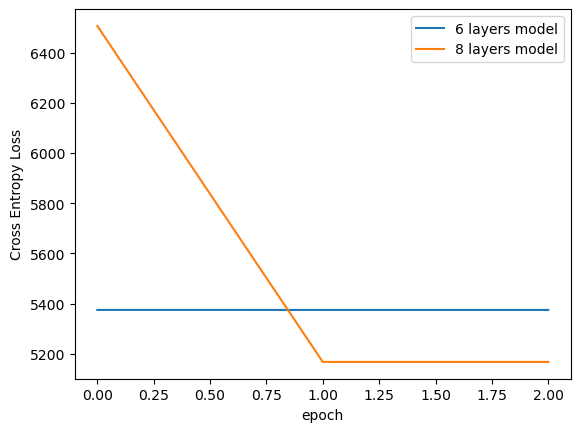

In [885]:

losses2=[]
for epoch in range(epochs):
    totalLoss = 0
    pred_wart = []
    for i in range(len(x)):
        ypred = model(x[i])
        y_pred_test=model(x_test[i])
        pred_wart.append(y_pred_test)
        loss = criterion(ypred, y[i])
        totalLoss+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses2.append(totalLoss)
    print('Total training loss: ', totalLoss)
    with torch.no_grad():
        loss2 = criterion(y_pred_test, y_test[len(x)])
        print(f'Loss test: {loss2:.8f}')
    ##if epoch%50==0 or epoch==0:
        ##print('Total loss: ', totalLoss)

plt.plot(range(epochs), losses, label='6 layers model')
plt.plot(range(epochs), losses2, label='8 layers model')#shows plot of the presented system
plt.legend()
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')
plt.show()

In [886]:
#sprawdzenie ile predykcji jest mniejszych od danego bledu
good = 0
wart = []
predyk2 = []
suma = 0
for i in range(len(y)):
    wart.append(y_test[i].item())
    predyk2.append(pred_wart[i].item())
    suma += abs(y[i].item() - pred_wart[i].item())
    if abs(y[i].item() - pred_wart[i].item()) < 0.2:
        good += 1
print(good/len(y))

print('sredni blad:', suma/len(y)) #Mean Absolute Error
#<0.15 = 0.54 (z wartosciami odstajacymi) 0.48623579221053004, 0.48876552535881806
#obliczanie błędu SSE - suma kwadratów błędu estymacji, błąd średniokwadratowy i RMSE
e = np.array(wart) - np.array(predyk2)
sse = np.sum(np.power(e, 2))
print('SSE:', sse)
mse = np.mean(np.power(e, 2))
print('MSE:', mse)
rmse = np.sqrt(np.mean(np.power(e, 2)))
print('RMSE:', rmse)

print('Max wart. testowa: ',max(wart))
print('Min wart. testowa: ',min(wart))
print('Max wart. przewidziana: ',max(predyk2))
print('Min wart. przewidziana: ',min(predyk2))

model=LinearRegression()
model.fit(x,y)
r_sq=model.score(x,y)
print(r_sq)
pd.qcut(predyk2,q=17,precision=0)

0.4833722748273984
sredni blad: 0.24195240312200372
SSE: 5182.662914614489
MSE: 0.09104690396877341
RMSE: 0.3017397951360964
Max wart. testowa:  11.989999771118164
Min wart. testowa:  9.630000114440918
Max wart. przewidziana:  10.955845832824707
Min wart. przewidziana:  10.595012664794922
0.6938631882179684


[(10.763, 10.77], (10.776, 10.782], (10.789, 10.796], (10.782, 10.789], (10.796, 10.803], ..., (10.77, 10.776], (10.749, 10.756], (10.763, 10.77], (10.756, 10.763], (10.756, 10.763]]
Length: 56923
Categories (17, interval[float64, right]): [(10.594000000000001, 10.713] < (10.713, 10.729] < (10.729, 10.74] < (10.74, 10.749] ... (10.811, 10.82] < (10.82, 10.831] < (10.831, 10.847] < (10.847, 10.956]]

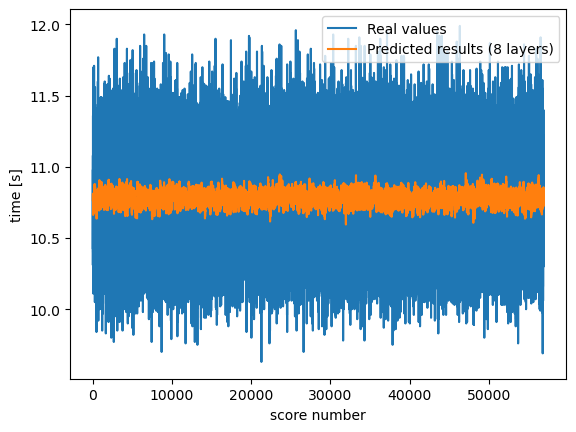

In [887]:
plt.plot(wart, label='Real values')
plt.plot(predyk2, label = 'Predicted results (8 layers)')
plt.xlabel('score number')
plt.ylabel('time [s]')
plt.legend(loc='upper right')

MODEL #3

In [888]:
model = nn.Sequential(
        nn.Linear(17, 64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.Sigmoid(),
        nn.Linear(128,1)
    )
model.to()
criterion = torch.nn.MSELoss()  #zmienic kryterium
optimizer = optim.SGD(model.parameters(), lr = 0.000975)#, momentum = 0.9)   #lr - learning rate

In [889]:

losses3=[]
for epoch in range(epochs):
    totalLoss = 0
    pred_wart = []
    for i in range(len(x)):
        ypred = model(x[i])
        y_pred_test=model(x_test[i])
        pred_wart.append(y_pred_test)
        loss = criterion(ypred, y[i])
        totalLoss+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses3.append(totalLoss)
    print('Total training loss: ', totalLoss)
    with torch.no_grad():
        loss2 = criterion(y_pred_test, y_test[len(x)])
        print(f'Loss test: {loss2:.8f}')
    ##if epoch%50==0 or epoch==0:
        ##print('Total loss: ', totalLoss)

plt.plot(range(epochs), losses, label='6 layers model')
plt.plot(range(epochs), losses2, label='8 layers model')#shows plot of the presented system
plt.plot(range(epochs), losses3, label='10 layers model')#shows plot of the presented system
plt.legend()
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')
plt.show()

c:\Users\marci\.julia\conda\3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


KeyboardInterrupt: 

In [ ]:
#sprawdzenie ile predykcji jest mniejszych od danego bledu
good = 0
wart = []
predyk3 = []
suma = 0
for i in range(len(y)):
    wart.append(y_test[i].item())
    predyk3.append(pred_wart[i].item())
    suma += abs(y[i].item() - pred_wart[i].item())
    if abs(y[i].item() - pred_wart[i].item()) < 0.2:
        good += 1
print(good/len(y))

print('sredni blad:', suma/len(y)) #Mean Absolute Error
#<0.15 = 0.54 (z wartosciami odstajacymi) 0.48623579221053004, 0.48876552535881806
#obliczanie błędu SSE - suma kwadratów błędu estymacji, błąd średniokwadratowy i RMSE
e = np.array(wart) - np.array(predyk3)
sse = np.sum(np.power(e, 2))
print('SSE:', sse)
mse = np.mean(np.power(e, 2))
print('MSE:', mse)
rmse = np.sqrt(np.mean(np.power(e, 2)))
print('RMSE:', rmse)

print('Max wart. testowa: ',max(wart))
print('Min wart. testowa: ',min(wart))
print('Max wart. przewidziana: ',max(predyk3))
print('Min wart. przewidziana: ',min(predyk3))

model=LinearRegression()
model.fit(x,y)
r_sq=model.score(x,y)
print(r_sq)
pd.qcut(predyk3,q=17,precision=0)

0.4723200183786578
sredni blad: 0.2516785854563839
SSE: 17314.439192755
MSE: 0.09944254769982482
RMSE: 0.3153451247440252
Max wart. testowa:  11.989999771118164
Min wart. testowa:  9.630000114440918
Max wart. przewidziana:  11.014248847961426
Min wart. przewidziana:  10.58243179321289
0.6166141706154313


[(10.735, 10.754], (10.754, 10.767], (10.777, 10.786], (10.786, 10.795], (10.786, 10.795], ..., (10.735, 10.754], (10.754, 10.767], (10.581000000000001, 10.735], (10.581000000000001, 10.735], (10.735, 10.754]]
Length: 174115
Categories (17, interval[float64, right]): [(10.581000000000001, 10.735] < (10.735, 10.754] < (10.754, 10.767] < (10.767, 10.777] ... (10.849, 10.859] < (10.859, 10.872] < (10.872, 10.89] < (10.89, 11.014]]

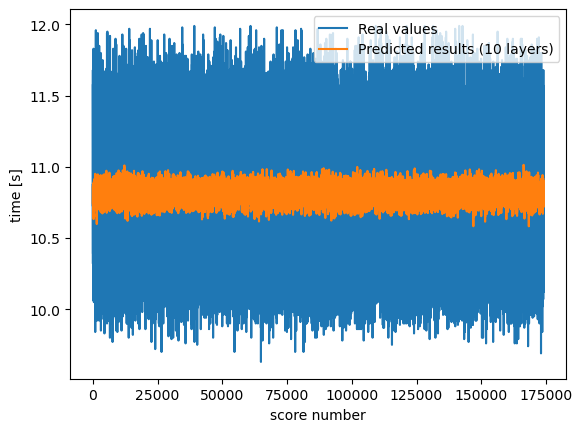

In [ ]:
plt.plot(wart, label='Real values')
plt.plot(predyk3, label = 'Predicted results (10 layers)')

plt.xlabel('score number')
plt.ylabel('time [s]')
plt.legend(loc='upper right')

MEAN INSTEAD OF NULL ON 8 layers

In [ ]:
x = torch.tensor(results_train2.values, dtype=torch.float)
x_test=torch.tensor(results_test2.values, dtype=torch.float)
y = torch.tensor(wynik_train2.values, dtype=torch.float)
y_test=torch.tensor(wynik_test2.values, dtype=torch.float)

In [ ]:
model = nn.Sequential(
        nn.Linear(17, 20),
        nn.ReLU(),
        nn.Linear(20,100),
        nn.Sigmoid(),
        nn.Linear(100,1)
    )
model.to()
criterion = torch.nn.MSELoss()  #zmienic kryterium
optimizer = optim.SGD(model.parameters(), lr = 0.000975)#, momentum = 0.9)   #lr - learning rate

c:\Users\marci\.julia\conda\3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Total training loss:  18288.57579817683
Loss test: 0.03116920
Total training loss:  17693.82182023954
Loss test: 0.03116920
Total training loss:  17693.822064492982
Loss test: 0.03116953


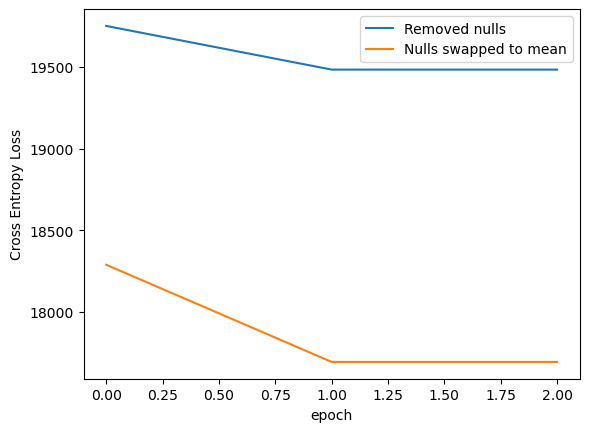

In [ ]:

losses2=[]
for epoch in range(epochs):
    totalLoss = 0
    pred_wart = []
    for i in range(len(x)):
        ypred = model(x[i])
        y_pred_test=model(x_test[i])
        pred_wart.append(y_pred_test)
        loss = criterion(ypred, y[i])
        totalLoss+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses2.append(totalLoss)
    print('Total training loss: ', totalLoss)
    with torch.no_grad():
        loss2 = criterion(y_pred_test, y_test[len(x)])
        print(f'Loss test: {loss2:.8f}')
    ##if epoch%50==0 or epoch==0:
        ##print('Total loss: ', totalLoss)

plt.plot(range(epochs), losses, label='Removed nulls')
plt.plot(range(epochs), losses2, label='Nulls swapped to mean')#shows plot of the presented system
plt.legend()
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')
plt.show()

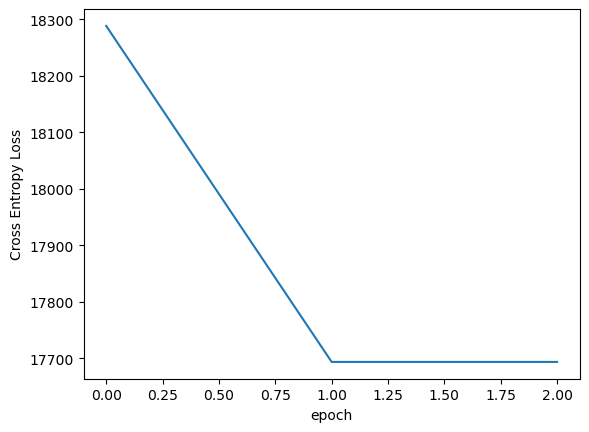

In [ ]:
plt.plot(range(epochs), losses2, label='Nulls swapped to mean')#shows plot of the presented system
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#sprawdzenie ile predykcji jest mniejszych od danego bledu
good = 0
wart = []
predyk3 = []
suma = 0
for i in range(len(y)):
    wart.append(y_test[i].item())
    predyk3.append(pred_wart[i].item())
    suma += abs(y[i].item() - pred_wart[i].item())
    if abs(y[i].item() - pred_wart[i].item()) < 0.2:
        good += 1
print(good/len(y))

print('sredni blad:', suma/len(y)) #Mean Absolute Error
#<0.15 = 0.54 (z wartosciami odstajacymi) 0.48623579221053004, 0.48876552535881806
#obliczanie błędu SSE - suma kwadratów błędu estymacji, błąd średniokwadratowy i RMSE
e = np.array(wart) - np.array(predyk3)
sse = np.sum(np.power(e, 2))
print('SSE:', sse)
mse = np.mean(np.power(e, 2))
print('MSE:', mse)
rmse = np.sqrt(np.mean(np.power(e, 2)))
print('RMSE:', rmse)

print('Max wart. testowa: ',max(wart))
print('Min wart. testowa: ',min(wart))
print('Max wart. przewidziana: ',max(predyk3))
print('Min wart. przewidziana: ',min(predyk3))

model=LinearRegression()
model.fit(x,y)
r_sq=model.score(x,y)
print(r_sq)
pd.qcut(predyk3,q=17,precision=0)

0.46650202452402145
sredni blad: 0.25482228994472206
SSE: 17746.70102027946
MSE: 0.1019251702626394
RMSE: 0.31925721646133454
Max wart. testowa:  11.989999771118164
Min wart. testowa:  9.630000114440918
Max wart. przewidziana:  11.091581344604492
Min wart. przewidziana:  10.466330528259277
0.6166141706154313


[(10.73, 10.75], (10.75, 10.76], (10.79, 10.8], (10.81, 10.82], (10.81, 10.82], ..., (10.46, 10.7], (10.7, 10.73], (10.46, 10.7], (10.46, 10.7], (10.7, 10.73]]
Length: 174115
Categories (17, interval[float64, right]): [(10.46, 10.7] < (10.7, 10.73] < (10.73, 10.75] < (10.75, 10.76] ... (10.86, 10.88] < (10.88, 10.9] < (10.9, 10.92] < (10.92, 11.09]]

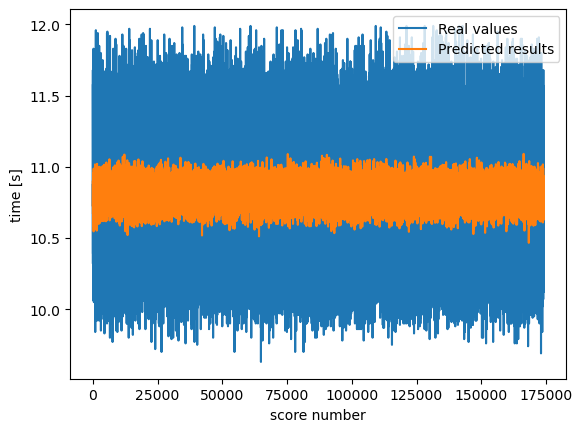

In [ ]:
plt.plot(wart, label='Real values')
plt.plot(predyk3, label = 'Predicted results')

plt.xlabel('score number')
plt.ylabel('time [s]')
plt.legend(loc='upper right')